In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression,RidgeCV,LassoCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

/home/yash/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/yash/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [3]:
train=pd.read_csv('/home/yash/Downloads/train_DaEJRFg.csv')
test=pd.read_csv('/home/yash/Downloads/test_TQDFDgg.csv')

In [4]:
train.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


In [5]:
test.shape,train.shape

((5048, 11), (11777, 12))

In [6]:
train.isnull().sum()

victim_id                       0
incident_time                   0
incident_date                   0
incident_location             307
incident_tehsil                 0
cause_of_emergency              0
base_to_scene_distance          0
scene_to_hospital_distance      0
roadway_feature                 0
road_type                       0
surrounding_area                0
criticality                     0
dtype: int64

In [7]:
test.isnull().sum()

victim_id                       0
incident_time                   0
incident_date                   0
incident_location             113
incident_tehsil                 0
cause_of_emergency              0
base_to_scene_distance          0
scene_to_hospital_distance      0
roadway_feature                 0
road_type                       0
surrounding_area                0
dtype: int64

In [8]:
train.criticality.value_counts()

0    11255
1      522
Name: criticality, dtype: int64

In [9]:
len(train.victim_id.unique())

11777

In [10]:
train.dtypes

victim_id                     object
incident_time                 object
incident_date                 object
incident_location             object
incident_tehsil               object
cause_of_emergency            object
base_to_scene_distance         int64
scene_to_hospital_distance     int64
roadway_feature               object
road_type                     object
surrounding_area              object
criticality                    int64
dtype: object

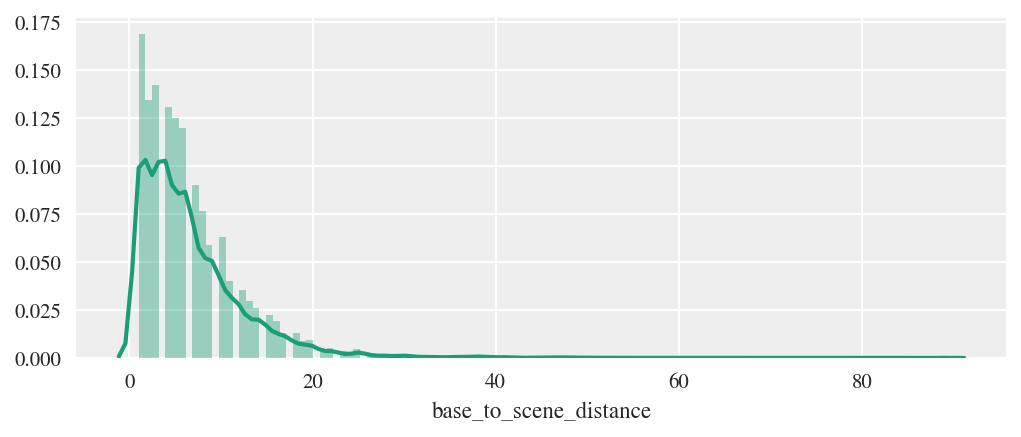

In [11]:
sns.distplot((train.base_to_scene_distance),bins=120)

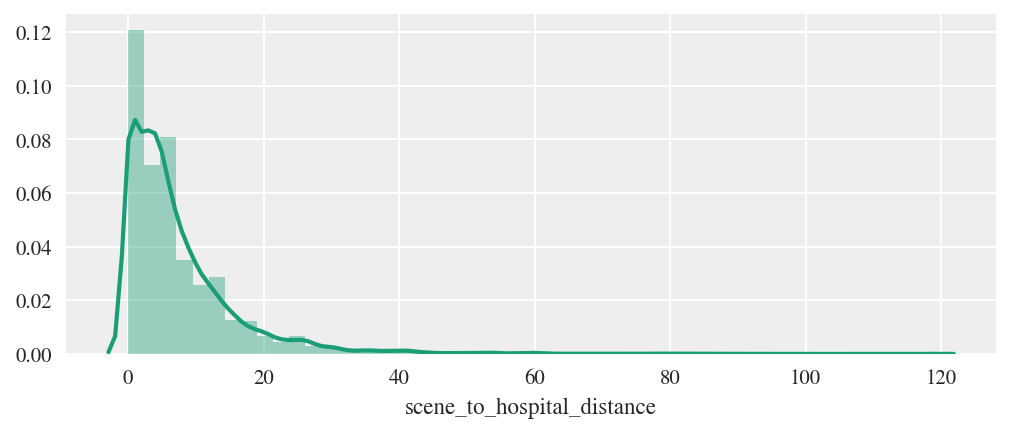

In [12]:
sns.distplot((train.scene_to_hospital_distance))

In [13]:
train['base_to_scene_distance']=train['base_to_scene_distance'].apply(lambda x:x+np.random.rand()*0.1)
train['scene_to_hospital_distance']=train['scene_to_hospital_distance'].apply(lambda x:x+np.random.rand()*0.1)
test['base_to_scene_distance']=test['base_to_scene_distance'].apply(lambda x:x+np.random.rand()*0.1)
test['scene_to_hospital_distance']=test['scene_to_hospital_distance'].apply(lambda x:x+np.random.rand()*0.1)

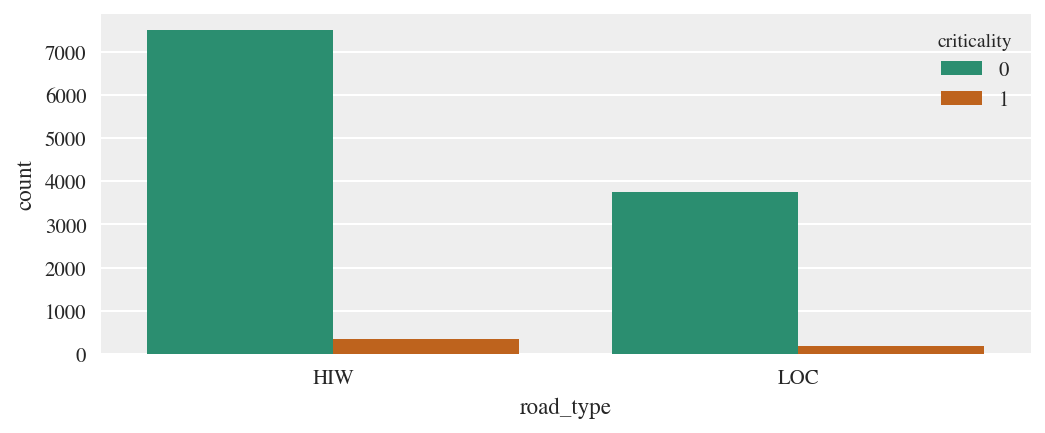

In [14]:
sns.countplot(x='road_type',data=train,hue='criticality')

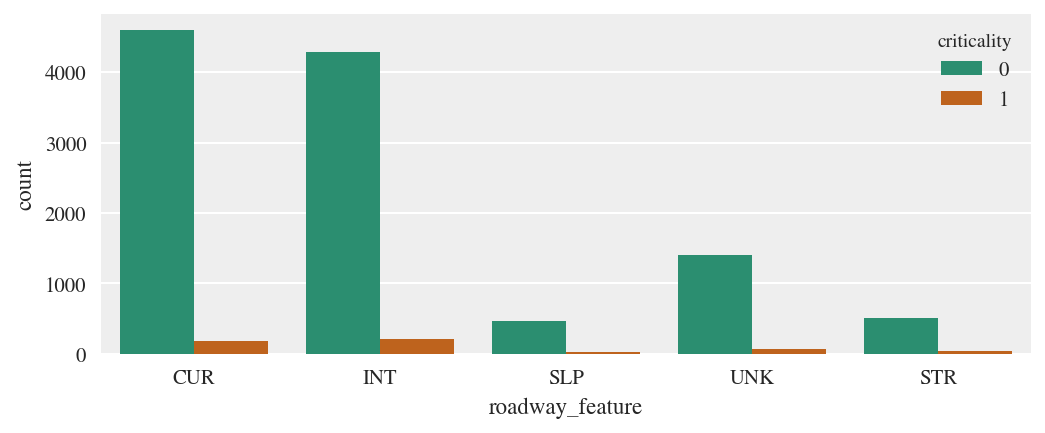

In [15]:
sns.countplot(x='roadway_feature',data=train,hue='criticality')

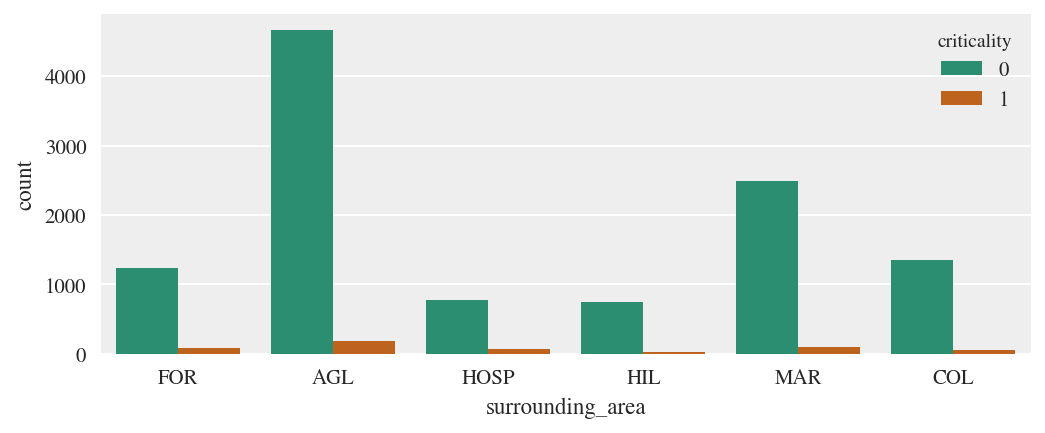

In [16]:
sns.countplot(x='surrounding_area',data=train,hue='criticality')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

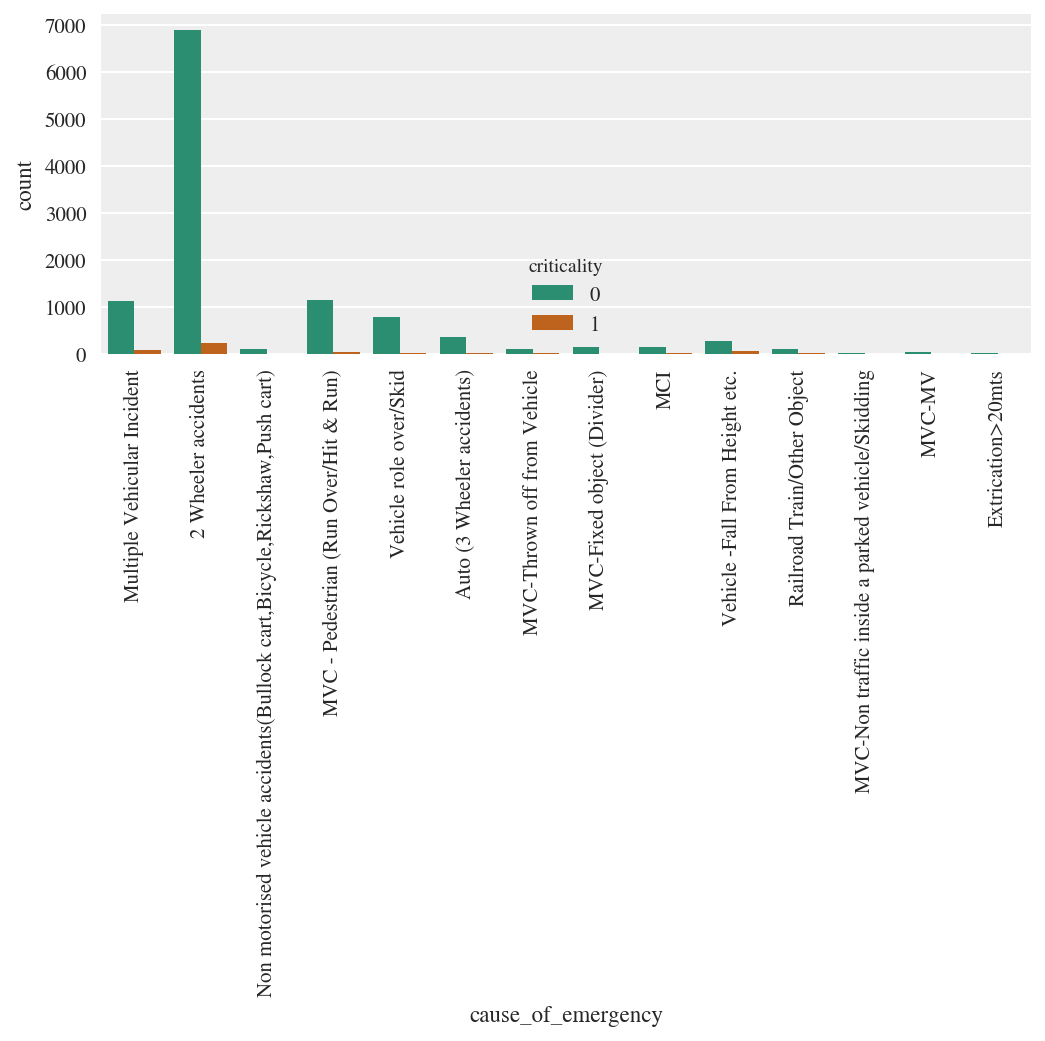

In [17]:
sns.countplot(x='cause_of_emergency',data=train,hue='criticality')
plt.xticks(rotation=90)

In [18]:
label=train['criticality']
train.drop('criticality',axis=1,inplace=True)

In [19]:
train['incident_time']=pd.to_datetime(train['incident_time'])
test['incident_time']=pd.to_datetime(test['incident_time'])
train['time']=train.incident_time.dt.hour
test['time']=test.incident_time.dt.hour
train['incident_date']=pd.to_datetime(train['incident_date'])
test['incident_date']=pd.to_datetime(test['incident_date'])
train['day']=train.incident_date.dt.dayofweek
train['month']=train.incident_date.dt.month
train['year']=train.incident_date.dt.year
test['day']=test.incident_date.dt.dayofweek
test['month']=test.incident_date.dt.month
test['year']=test.incident_date.dt.year
train.drop(['incident_time','incident_date'],axis=1,inplace=True)
test.drop(['incident_time','incident_date'],axis=1,inplace=True)

In [20]:
train_unique=[]
test_unique=[]
for i in list(train.columns.values):
    a=len(train[i].unique())
    b=len(test[i].unique())
    train_unique.append(a)
    test_unique.append(b)
details=pd.DataFrame({'features':train.columns.values,'train_unique':train_unique,'test_unique':test_unique,'data_type':train.dtypes.values})
details    

,data_type,features,test_unique,train_unique
0,object,victim_id,5048,11777
1,object,incident_location,2760,5522
2,object,incident_tehsil,7,7
3,object,cause_of_emergency,14,14
4,float64,base_to_scene_distance,5048,11777
5,float64,scene_to_hospital_distance,5048,11777
6,object,roadway_feature,5,5
7,object,road_type,2,2
8,object,surrounding_area,6,6
9,int64,time,24,24


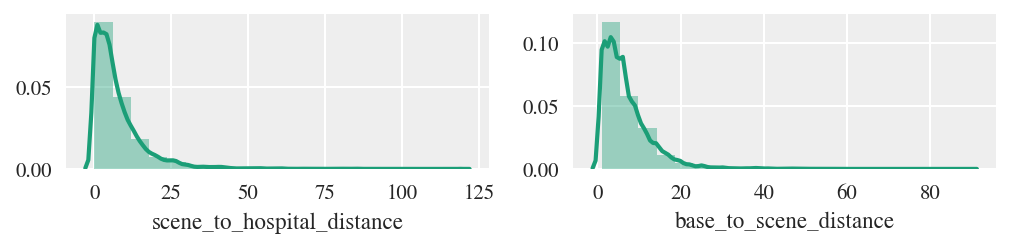

In [21]:
plt.subplot(221)
sns.distplot(train.scene_to_hospital_distance,bins=20)
plt.subplot(222)
sns.distplot(train.base_to_scene_distance,bins=20)

In [22]:
train_on=[x for x in train.columns.values if x not in ['victim_id','incident_location']] #initially incident_location 
                                                                                           #was ignored
#train['incident_location']=train.groupby('incident_tehsil')['incident_location'].apply(lambda x:x.fillna(x.mode()[0]))
#test['incident_location']=test.groupby('incident_tehsil')['incident_location'].apply(lambda x:x.fillna(x.mode()[0]))

Text(0.5,1,'base_to_scene')

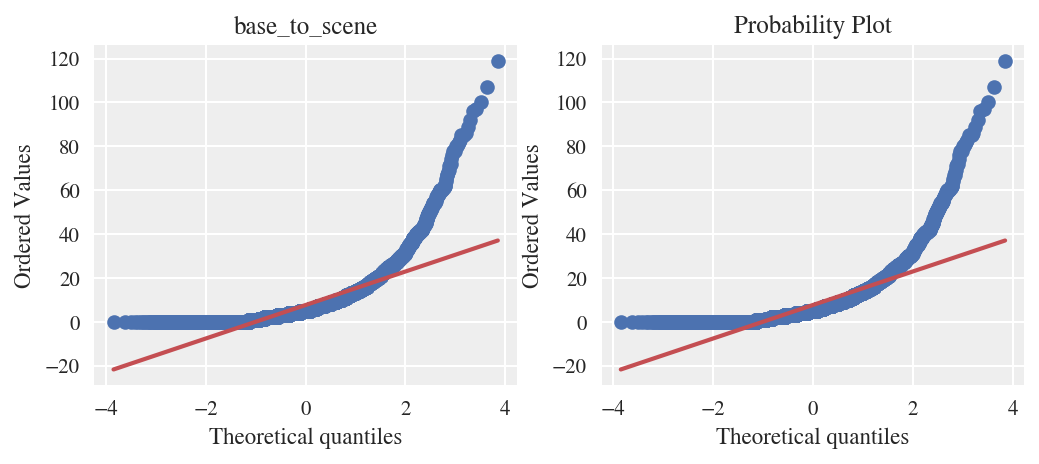

In [34]:
from scipy.stats import probplot
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1)
probplot(train.scene_to_hospital_distance,plot=ax1)
ax1.set_title('scene_to_hospital')
probplot(train.scene_to_hospital_distance,plot=ax2)
ax1.set_title('base_to_scene')

In [35]:
train['base_to_scene_distance']=np.log1p(train['base_to_scene_distance'])
train['scene_to_hospital_distance']=np.log1p(train['scene_to_hospital_distance'])
test['base_to_scene_distance']=np.log1p(test['base_to_scene_distance'])
test['scene_to_hospital_distance']=np.log1p(test['scene_to_hospital_distance'])

Text(0.5,1,'base_to_scene')

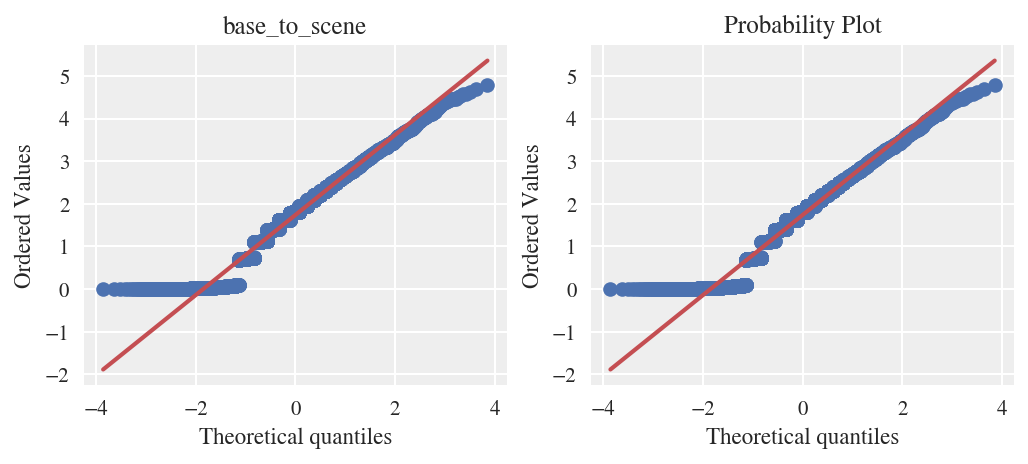

In [36]:
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1)
probplot(train.scene_to_hospital_distance,plot=ax1)
ax1.set_title('scene_to_hospital')
probplot(train.scene_to_hospital_distance,plot=ax2)
ax2.set_title('base_to_scene')

In [37]:
for i in train_on:
    if train[i].dtype==object:
        le=LabelEncoder()
        train[i]=le.fit_transform(train[i])
        test[i]=le.transform(test[i])

In [38]:
X_train,X_test,y_train,y_test=train_test_split(train[train_on],label,test_size=.25)

In [39]:
import xgboost as xgb

In [40]:
xg=xgb.XGBClassifier(n_estimators=100)
xg.fit(train[train_on],label)
predict_crit=xg.predict_proba(test[train_on])
#pred_test=xg.predict_proba(X_test)
#roc_auc_score(y_test,pred_test[:,1])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

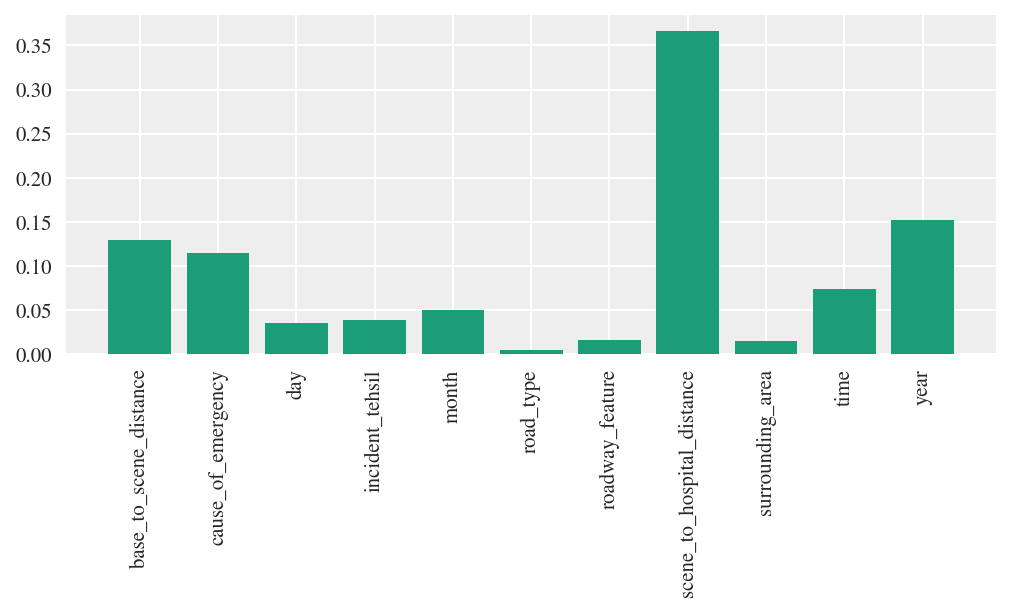

In [41]:
plt.bar(train_on,xg.feature_importances_)
plt.xticks(rotation=90)

In [30]:
# rf=RandomForestClassifier()
# param={'n_estimators':[50,100,150,250,400],"max_features":['sqrt','log2']}
# gs=GridSearchCV(estimator=rf,param_grid=param,scoring='roc_auc',cv=5)
# gs.fit(train[train_on],label)
# gs.best_params_

In [31]:
# grad=GradientBoostingClassifier()
# param={'n_estimators':[50,100,150,250,400],"max_features":['sqrt','log2'],'max_depth':[3,5,7,9]}
# gs=GridSearchCV(estimator=grad,param_grid=param,scoring='roc_auc',cv=5)
# gs.fit(train[train_on],label)
# gs.best_params_

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

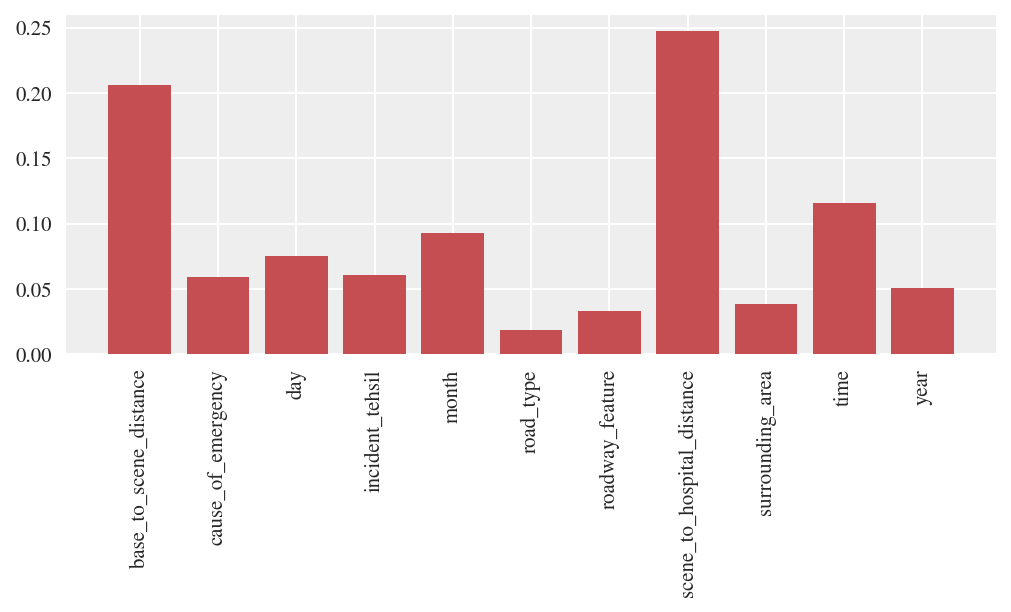

In [42]:
rf=RandomForestClassifier(n_estimators=350,max_features='sqrt')
rf.fit(train[train_on],label)
predict_rf=rf.predict_proba(test[train_on])
plt.bar(train_on,rf.feature_importances_,color='r')
plt.xticks(rotation=90)
# pred_test_rf=rf.predict_proba(X_test)
#roc_auc_score(y_test,pred_test_rf[:,1])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

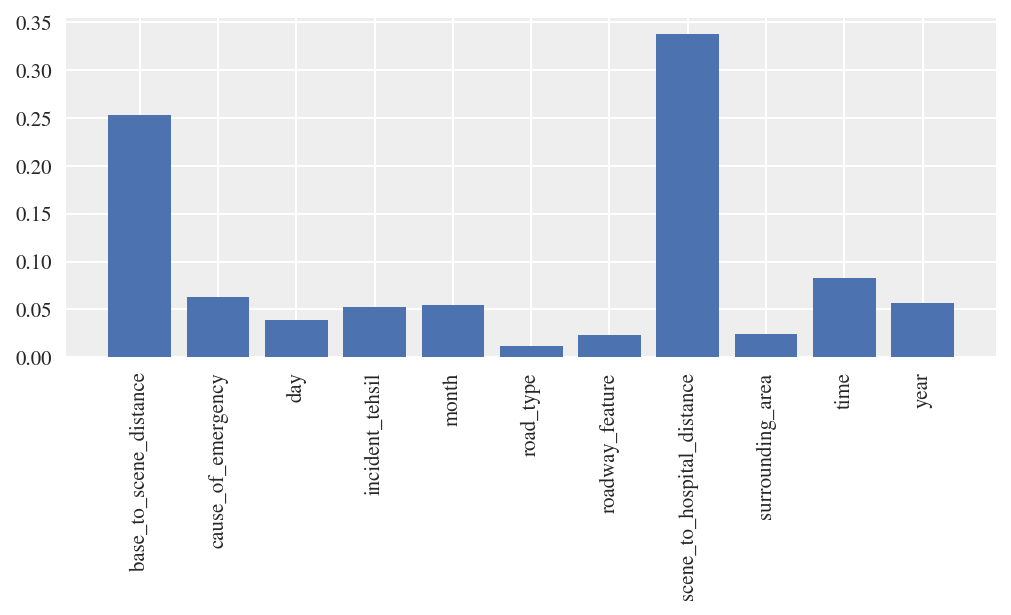

In [43]:
gbm=GradientBoostingClassifier(max_depth=3,n_estimators=350,max_features='log2')
gbm.fit(train[train_on],label)
predict_gbm=gbm.predict_proba(test[train_on])
plt.bar(train_on,gbm.feature_importances_,color='b')
plt.xticks(rotation=90)
# pred_test_gbm=gbm.predict_proba(X_test)
# roc_auc_score(y_test,pred_test_gbm[:,1])

In [44]:
pred_sub=      predict_crit[:,1]*0.4 + predict_rf[:,1]*0.2 +predict_gbm[:,1]*0.4
sub=pd.DataFrame({'victim_id':test.victim_id,'criticality':   pred_sub})
sub.set_index('victim_id',inplace=True)
sub.to_csv('/home/yash/Desktop/AV_DSG.csv')

This submission gave public leaderboard score of 0.827899
After this we are going to do some more feature engineering 

In [25]:
# from tpot import TPOTClassifier

In [52]:
# tpot=TPOTClassifier(scoring='roc_auc',population_size=200,generations=10,verbosity=2)
# tpot.fit(X_train[train_on],y_train)
# print(tpot.score(X_test[train_on], y_test))

Optimization Progress:  18%|█▊        | 400/2200 [18:01<1:18:02,  2.60s/pipeline]

Generation 1 - Current best internal CV score: 0.7957675372787778


Optimization Progress:  27%|██▋       | 600/2200 [33:59<50:21,  1.89s/pipeline]   

Generation 2 - Current best internal CV score: 0.7957675372787778


Optimization Progress:  36%|███▋      | 800/2200 [47:30<51:08,  2.19s/pipeline]  

Generation 3 - Current best internal CV score: 0.7958885893587986


Optimization Progress:  45%|████▌     | 1000/2200 [1:02:38<1:38:12,  4.91s/pipeline]

Generation 4 - Current best internal CV score: 0.7958885893587986


Optimization Progress:  55%|█████▍    | 1200/2200 [1:18:01<1:00:57,  3.66s/pipeline]

Generation 5 - Current best internal CV score: 0.7993815478561188


Optimization Progress:  64%|██████▎   | 1400/2200 [1:31:32<39:10,  2.94s/pipeline]  

Generation 6 - Current best internal CV score: 0.7993815478561188


Optimization Progress:  73%|███████▎  | 1600/2200 [1:44:48<34:12,  3.42s/pipeline]  

Generation 7 - Current best internal CV score: 0.7993815478561188


Optimization Progress:  82%|████████▏ | 1800/2200 [1:58:57<16:14,  2.44s/pipeline]  

Generation 8 - Current best internal CV score: 0.7993815478561188




TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=1.0, min_samples_leaf=13, min_samples_split=16, n_estimators=100)
0.775566456558


In [53]:
# ext=ExtraTreesClassifier(bootstrap=True,criterion='entropy',max_features=0.65,min_samples_leaf=13,
#                          min_samples_split=16,n_estimators=100)

In [54]:
# ext.fit(train[train_on],label)
# pred_ext=ext.predict_proba(test[train_on])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

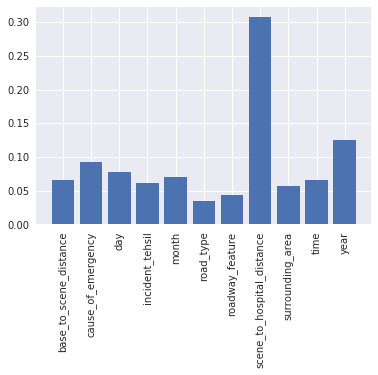

In [55]:
# plt.bar(train_on,ext.feature_importances_)
# plt.xticks(rotation=90)

# Adding new features

In [45]:
train_new=train[train_on]
test_new=test[train_on]


In [46]:
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list


In [47]:
def getMeanVar(compute_df, label_df, var_name):
        grouped_df = label_df.groupby(var_name)
       
        mean_dict = {}
        for name, group in grouped_df:
                mean_dict[name] = np.mean(np.array(group["criticality"]))

        mean_list = []
        for index, row in compute_df.iterrows():
                name = row[var_name]
                mean_list.append(mean_dict.get(name,0))
        return mean_list        

In [48]:
#creating new features for test and train
#1) this one is wrt count 
train_new['year_count']=getCountVar(train_new,train_new,'year')
train_new['cause_count']=getCountVar(train_new,train_new,'cause_of_emergency')
train_new['time_count']=getCountVar(train_new,train_new,'time')
train_new['roadway_feature_count']=getCountVar(train_new,train_new,'roadway_feature')
test_new['year_count']=getCountVar(test_new,train_new,'year')
test_new['cause_count']=getCountVar(test_new,train_new,'cause_of_emergency')
test_new['time_count']=getCountVar(test_new,train_new,'time')
test_new['roadway_feature_count']=getCountVar(test_new,train_new,'roadway_feature')


In [49]:
train_new['criticality']=label

In [50]:
train_new['year_mean']=getMeanVar(train_new,train_new,'year')
train_new['cause_mean']=getMeanVar(train_new,train_new,'cause_of_emergency')
train_new['time_mean']=getMeanVar(train_new,train_new,'time')
train_new['roadway_mean']=getMeanVar(train_new,train_new,'roadway_feature')
test_new['year_mean']=getMeanVar(test_new,train_new,'year')
test_new['cause_mean']=getMeanVar(test_new,train_new,'cause_of_emergency')
test_new['time_mean']=getMeanVar(test_new,train_new,'time')
test_new['roadway_mean']=getMeanVar(test_new,train_new,'roadway_feature')

In [51]:
train_new.head()

,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,time,day,month,year,year_count,cause_count,time_count,roadway_feature_count,criticality,year_mean,cause_mean,time_mean,roadway_mean
0,4,9,2.645976,2.567223,0,0,2,22,2,7,2012,2045,1196,829,4769,0,0.036186,0.063545,0.038601,0.037115
1,4,0,0.706763,1.798877,0,0,0,20,4,2,2011,1915,7127,973,4769,0,0.017755,0.032973,0.047276,0.037115
2,4,10,1.109432,1.129131,1,1,4,20,5,7,2009,1829,97,973,4492,0,0.097321,0.000000,0.047276,0.045859
3,4,0,2.198543,1.609750,0,0,3,15,5,5,2012,2045,7127,668,4769,0,0.036186,0.032973,0.040419,0.037115
4,5,0,0.704832,3.297292,0,0,0,16,0,12,2010,1828,7127,700,4769,0,0.032823,0.032973,0.044286,0.037115


In [52]:
train_new.drop('criticality',axis=1,inplace=True)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(train_new,label,test_size=0.25)

In [56]:
xg_mod=xgb.XGBClassifier(n_estimators=70)
xg_mod.fit(X_train,y_train)
predict_new=xg_mod.predict_proba(X_test)
p=predict_new[:,1]
roc_auc_score(y_test,p)

0.78137328332437606

In [62]:
param={
      'max_depth':[3,5,9],
      'min_child_weight':[1,3,5],
      'subsample':[0.6,0.8,1.0],
      'reg_lambda':[.01,.1,1.0],
      'gamma':[0.05,0.1,.5,.9],
      'reg_alpha':[.1,.5,1.0]}
gs=GridSearchCV(estimator=xg_mod,param_grid=param,scoring='roc_auc',cv=8)

In [63]:
gs.fit(train_new,label)

GridSearchCV(cv=8, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.02, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=75,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 9], 'min_child_weight': [1, 3, 5], 'subsample': [0.6, 0.8, 1.0], 'reg_lambda': [0.01, 0.1, 1.0], 'gamma': [0.05, 0.1, 0.5, 0.9], 'reg_alpha': [0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [64]:
gs.best_params_

{'gamma': 0.05,
 'max_depth': 3,
 'min_child_weight': 3,
 'reg_alpha': 0.5,
 'reg_lambda': 0.01,
 'subsample': 0.8}

In [76]:
xg_mod=xgb.XGBClassifier(n_estimators=80,learning_rate=0.1,
                        
                         max_depth=3,
            
                         min_child_weight=3,
              
                         subsample=.8,
         
                         reg_lambda=.01,
          
                         gamma=.05,
          
                         reg_alpha=.5)


xg_mod.fit(X_train,y_train)
predict_new=xg_mod.predict_proba(X_test)
p=predict_new[:,1]
roc_auc_score(y_test,p)

0.79407325244994342

In [58]:
gbm_mod=GradientBoostingClassifier(n_estimators=150,learning_rate=0.1,
                         max_depth=4,
                                subsample=.8,
                                  max_features='log2')
gbm_mod.fit(X_train,y_train)
predict_new_1=gbm_mod.predict_proba(X_test)
p_1=predict_new_1[:,1]
roc_auc_score(y_test,p_1)

0.75801305874146674

In [59]:
rf_mod=RandomForestClassifier(n_estimators=250,criterion='entropy',
                         max_depth=11,
                                max_features='log2')
rf_mod.fit(X_train,y_train)
pred_rf=rf_mod.predict_proba(X_test)
p_3=pred_rf[:,1]
roc_auc_score(y_test,p_3)

0.76672079221506895

In [69]:
from sklearn.decomposition import PCA
minmax=MinMaxScaler()

In [70]:
train_new=minmax.fit_transform(train_new)
test_new=minmax.transform(test_new)


In [78]:

def decompose(n):
    pca=PCA(n_components=n)
    train_X=pca.fit_transform(train_new)
    test_X=pca.transform(test_new)
    return train_X,test_X

In [84]:
train_X,test_X=decompose(10)

In [85]:

xg_mod=xgb.XGBClassifier(n_estimators=75,learning_rate=0.1,

                     max_depth=3,

                     min_child_weight=3,

                     subsample=.8,

                     reg_lambda=.1,

                     gamma=.02,

                     reg_alpha=.1)

gbm_mod=GradientBoostingClassifier(n_estimators=150,learning_rate=0.1,
                     max_depth=4,
                            subsample=.8,
                              max_features='log2')

rf_mod=RandomForestClassifier(n_estimators=350,criterion='entropy',
                     max_depth=11,
                            max_features='log2')
xg_mod.fit(train_X,label)
gbm_mod.fit(train_X,label)
rf_mod.fit(train_X,label)



xg_final=xg_mod.predict_proba(test_X)
gbm_final=gbm_mod.predict_proba(test_X)
rf_final=rf_mod.predict_proba(test_X)
  



Text(0.5,1,'xgb_importance')

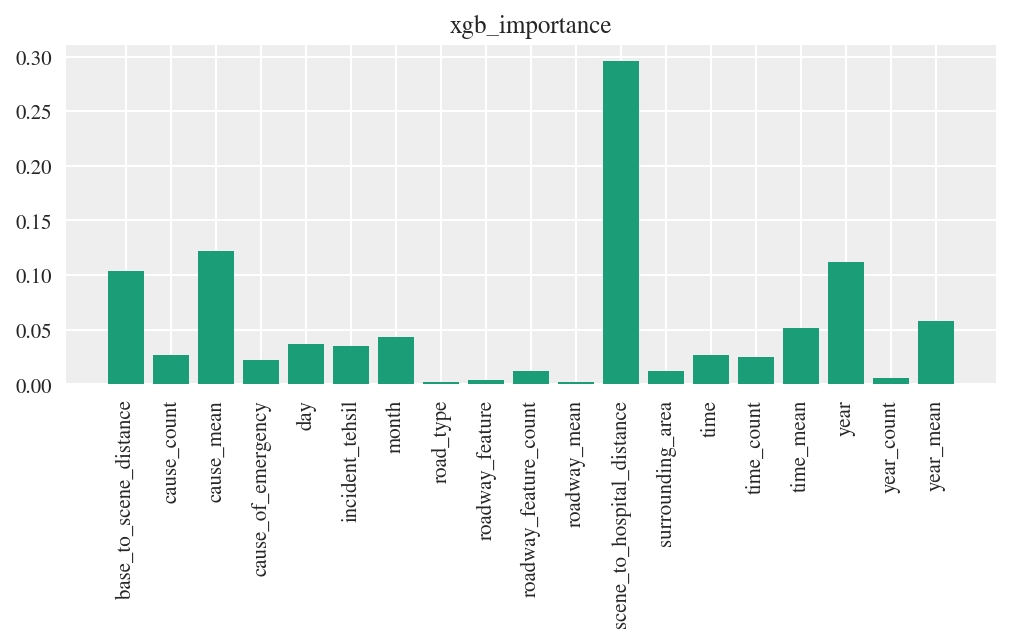

In [77]:
plt.bar(X_train.columns.values,xg_mod.feature_importances_)
plt.xticks(rotation=90)
plt.title('xgb_importance')

Text(0.5,1,'gbm_importance')

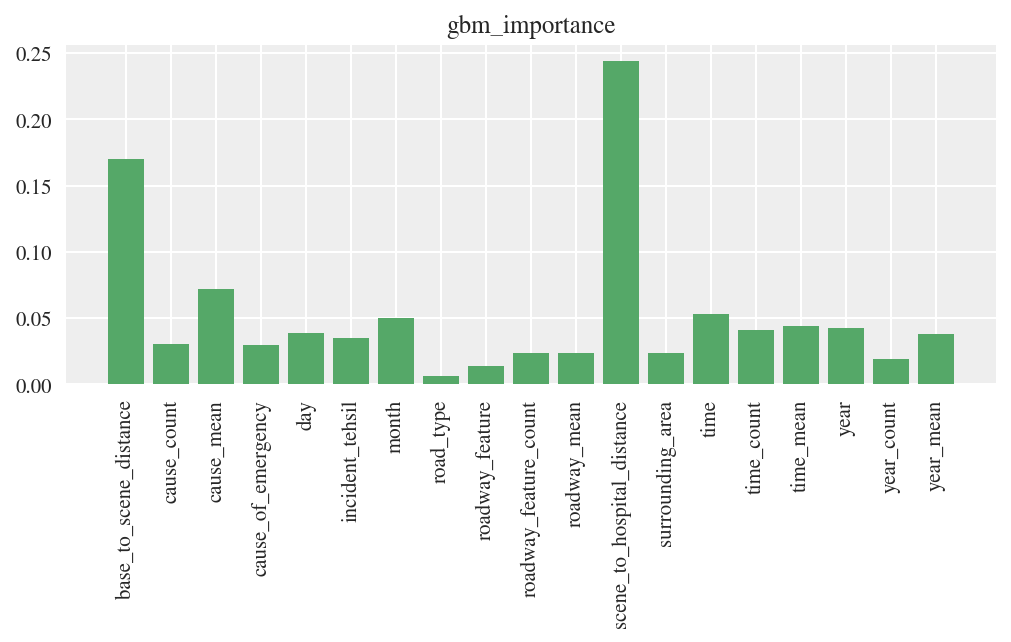

In [78]:
plt.bar(X_train.columns.values,gbm_mod.feature_importances_,color='g')
plt.xticks(rotation=90)
plt.title('gbm_importance')

Text(0.5,1,'rf_importance')

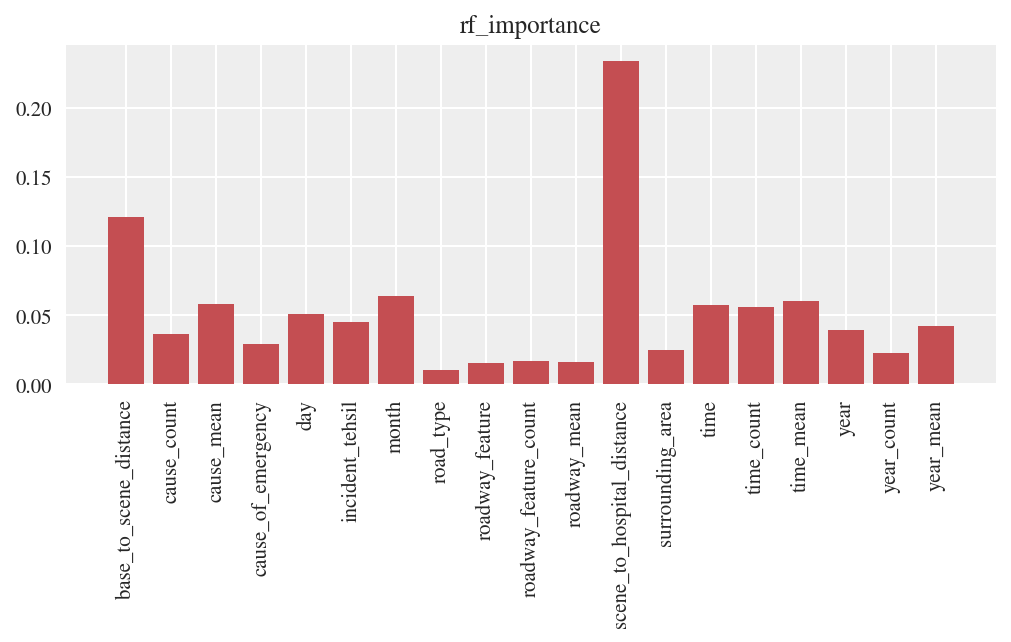

In [79]:
plt.bar(X_train.columns.values,rf_mod.feature_importances_,color='r')
plt.xticks(rotation=90)
plt.title('rf_importance')

In [81]:
# p_new=xg_final[:,1]*0.5 +  gbm_final[:,1]*0.25 + rf_final[:,1]*0.25
# sub=pd.DataFrame({'victim_id':test.victim_id,'criticality':   p_new })
# sub.set_index('victim_id',inplace=True)
# sub.to_csv('/home/yash/Desktop/AV_DSG_new_Data.csv')